# Name : Suman Jha    

Here , we will do the explanatory data analysis of the retail store sales and profit

# Importing all the necessary packages 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Dataset 

In [5]:
samplesuperstore = pd.read_csv('SampleSuperstore.csv')
samplesuperstore

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


# Checking Statistics of the Dataset

In [6]:
samplesuperstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [7]:
samplesuperstore.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


# Filtering the Dataset 

In [8]:
#checking for null values in the dataset
samplesuperstore.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [9]:
#now lets check if there is any duplicate values in the dataset
samplesuperstore.duplicated().sum()

17

In [10]:
#lets remove all the duplicate values from the dataset
# store the data into new object

superstore = samplesuperstore.drop_duplicates()

#checking if any duplicate value still remains
superstore.duplicated().sum()

0

In [11]:
superstore.shape

(9977, 13)

In [12]:
superstore = superstore.sort_values(by=['Sales'], ascending=False)
superstore.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
2697,Standard Class,Home Office,United States,Jacksonville,Florida,32216,South,Technology,Machines,22638.480,6,0.5,-1811.0784
6826,Standard Class,Corporate,United States,Lafayette,Indiana,47905,Central,Technology,Copiers,17499.950,5,0.0,8399.9760
8153,First Class,Consumer,United States,Seattle,Washington,98115,West,Technology,Copiers,13999.960,4,0.0,6719.9808
2623,First Class,Home Office,United States,New York City,New York,10024,East,Technology,Copiers,11199.968,4,0.2,3919.9888
4190,Standard Class,Consumer,United States,Newark,Delaware,19711,East,Technology,Copiers,10499.970,3,0.0,5039.9856
9039,Standard Class,Consumer,United States,Detroit,Michigan,48205,Central,Office Supplies,Binders,9892.740,13,0.0,4946.3700
4098,Standard Class,Consumer,United States,Minneapolis,Minnesota,55407,Central,Office Supplies,Binders,9449.950,5,0.0,4630.4755
4277,Standard Class,Corporate,United States,Lakewood,New Jersey,8701,East,Technology,Machines,9099.930,7,0.0,2365.9818
8488,Second Class,Consumer,United States,Arlington,Virginia,22204,South,Technology,Machines,8749.950,5,0.0,2799.9840
6425,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,19120,East,Technology,Copiers,8399.976,4,0.4,1119.9968


# Data Analysis 

In [13]:
print("Total sales is: ")
print(superstore['Sales'].sum())

Total sales is: 
2296195.5903000007


In [14]:
print("Maximum sales : ")
print(superstore['Sales'].max())

Maximum sales : 
22638.48


In [15]:
print("Total profit is : ")
print(superstore['Profit'].sum())

Total profit is : 
286241.4226


In [16]:
print("Maximum profit is: ")
print(superstore['Profit'].max())

Maximum profit is: 
8399.976


In [17]:
superstore.groupby(['State'])['Sales'].sum().sort_values(ascending=False)

State
California              457576.2715
New York                310827.1510
Texas                   170124.5418
Washington              138560.8100
Pennsylvania            116496.3620
Florida                  89473.7080
Illinois                 80162.5370
Ohio                     77976.7640
Michigan                 75879.6440
Virginia                 70636.7200
North Carolina           55603.1640
Indiana                  53555.3600
Georgia                  49095.8400
Kentucky                 36591.7500
New Jersey               35764.3120
Arizona                  35282.0010
Wisconsin                32114.6100
Colorado                 32108.1180
Tennessee                30661.8730
Minnesota                29863.1500
Massachusetts            28634.4340
Delaware                 27451.0690
Maryland                 23705.5230
Rhode Island             22627.9560
Missouri                 22205.1500
Oklahoma                 19683.3900
Alabama                  19510.6400
Oregon                

Most sales done in California and New York

Worst sales done in West Virginia and North Dakota

In [18]:
superstore.groupby(['State'])['Profit'].sum().sort_values(ascending=False)

State
California              76330.7891
New York                74015.4622
Washington              33368.2375
Michigan                24428.0903
Virginia                18597.9504
Indiana                 18382.9363
Georgia                 16250.0433
Kentucky                11199.6966
Minnesota               10823.1874
Delaware                 9977.3748
New Jersey               9772.9138
Wisconsin                8401.8004
Rhode Island             7285.6293
Maryland                 7031.1788
Massachusetts            6785.5016
Missouri                 6436.2105
Alabama                  5786.8253
Oklahoma                 4853.9560
Arkansas                 4008.6871
Connecticut              3511.4918
Nevada                   3316.7659
Mississippi              3172.9762
Utah                     2546.5335
Vermont                  2244.9783
Louisiana                2196.1023
Nebraska                 2037.0942
Montana                  1833.3285
South Carolina           1769.0566
New Hampshire 

Most profit made in California and New York

Worst profit made in Ohio and Texas

C:\Users\suman jha\AppData\Local\Temp\ipykernel_5712\1736848376.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  superstore.groupby(['State'])['Sales', 'Profit'].sum().plot.bar(color=['violet','green'],figsize=(20,10))


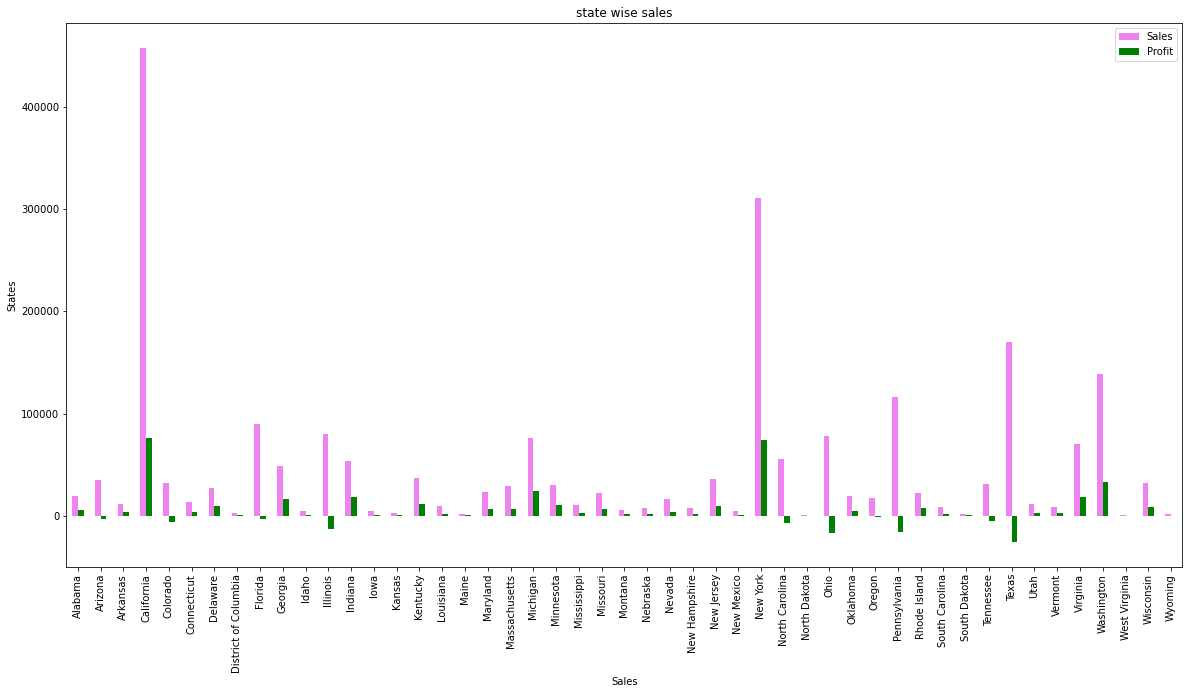

In [19]:
superstore.groupby(['State'])['Sales', 'Profit'].sum().plot.bar(color=['violet','green'],figsize=(20,10))
plt.title('state wise sales')
plt.xlabel('Sales')
plt.ylabel('States')
plt.show()

In [20]:
superstore.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
2697,Standard Class,Home Office,United States,Jacksonville,Florida,32216,South,Technology,Machines,22638.480,6,0.5,-1811.0784
6826,Standard Class,Corporate,United States,Lafayette,Indiana,47905,Central,Technology,Copiers,17499.950,5,0.0,8399.9760
8153,First Class,Consumer,United States,Seattle,Washington,98115,West,Technology,Copiers,13999.960,4,0.0,6719.9808
2623,First Class,Home Office,United States,New York City,New York,10024,East,Technology,Copiers,11199.968,4,0.2,3919.9888
4190,Standard Class,Consumer,United States,Newark,Delaware,19711,East,Technology,Copiers,10499.970,3,0.0,5039.9856
9039,Standard Class,Consumer,United States,Detroit,Michigan,48205,Central,Office Supplies,Binders,9892.740,13,0.0,4946.3700
4098,Standard Class,Consumer,United States,Minneapolis,Minnesota,55407,Central,Office Supplies,Binders,9449.950,5,0.0,4630.4755
4277,Standard Class,Corporate,United States,Lakewood,New Jersey,8701,East,Technology,Machines,9099.930,7,0.0,2365.9818
8488,Second Class,Consumer,United States,Arlington,Virginia,22204,South,Technology,Machines,8749.950,5,0.0,2799.9840
6425,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,19120,East,Technology,Copiers,8399.976,4,0.4,1119.9968


<BarContainer object of 4 artists>

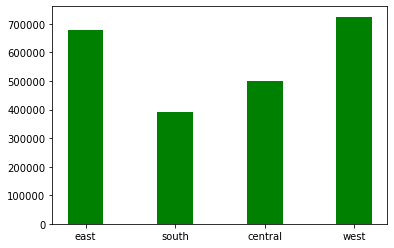

In [21]:
#sales according to the region 

east = superstore.groupby(['Region'])['Sales'].sum()['East']
south = superstore.groupby(['Region'])['Sales'].sum()['South']
central = superstore.groupby(['Region'])['Sales'].sum()['Central']
west = superstore.groupby(['Region'])['Sales'].sum()['West']
s_region=[east,south,central,west]
region= ['east','south','central','west']
plt.bar(region, s_region, width=0.4, color="Green")

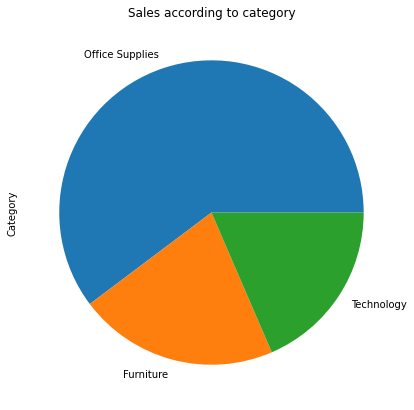

In [24]:
#sales according to category
plt.figure(figsize=(15,7))
superstore['Category'].value_counts().plot.pie()
plt.title("Sales according to category")
plt.show()

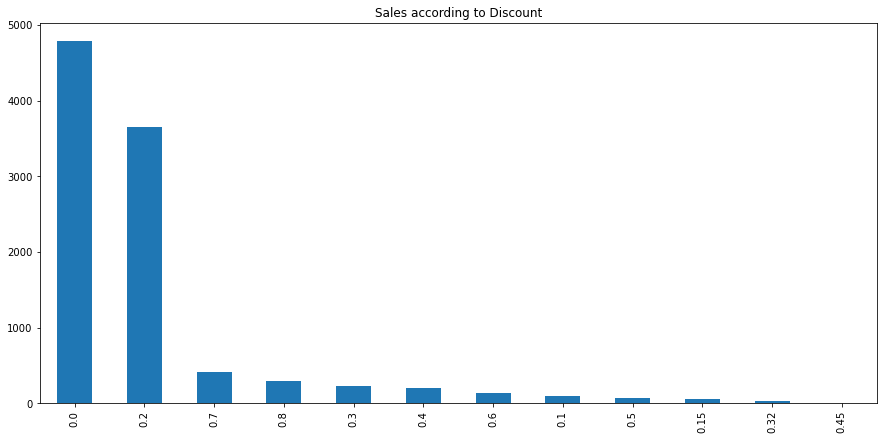

In [43]:
#sales according to discount
plt.figure(figsize=(15,7))
superstore['Discount'].value_counts().plot.bar()
plt.title("Sales according to Discount")
plt.show()

C:\Users\suman jha\AppData\Local\Temp\ipykernel_5712\2007364293.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  superstore.groupby(['Discount'])['Sales', 'Profit'].sum().plot.bar(color=['blue','green'],figsize=(15,7))


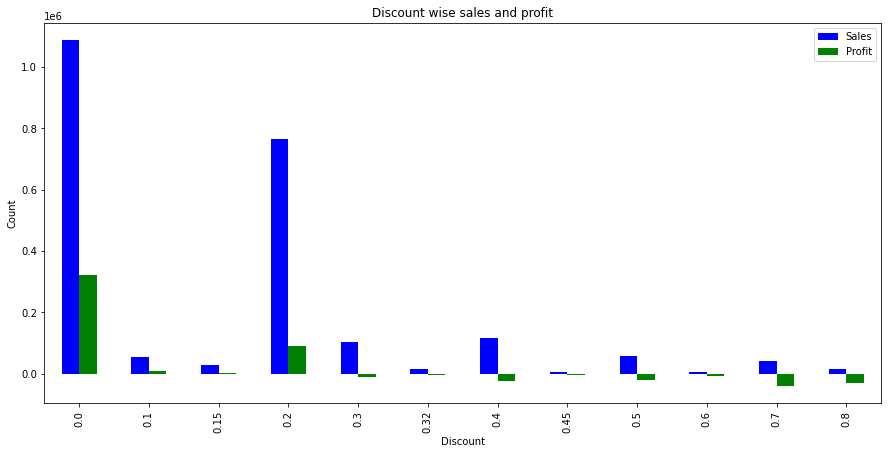

In [56]:
#discount wise sales and profit multiset graph
superstore.groupby(['Discount'])['Sales', 'Profit'].sum().plot.bar(color=['blue','green'],figsize=(15,7))
plt.xticks(rotation=90)
plt.title('Discount wise sales and profit')
plt.xlabel('Discount')
plt.ylabel('Count')
plt.show()

C:\Users\suman jha\AppData\Local\Temp\ipykernel_5712\2882038515.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  superstore.groupby(['Segment'])['Sales', 'Profit'].sum().plot.bar(color=['violet','green'],figsize=(15,7))


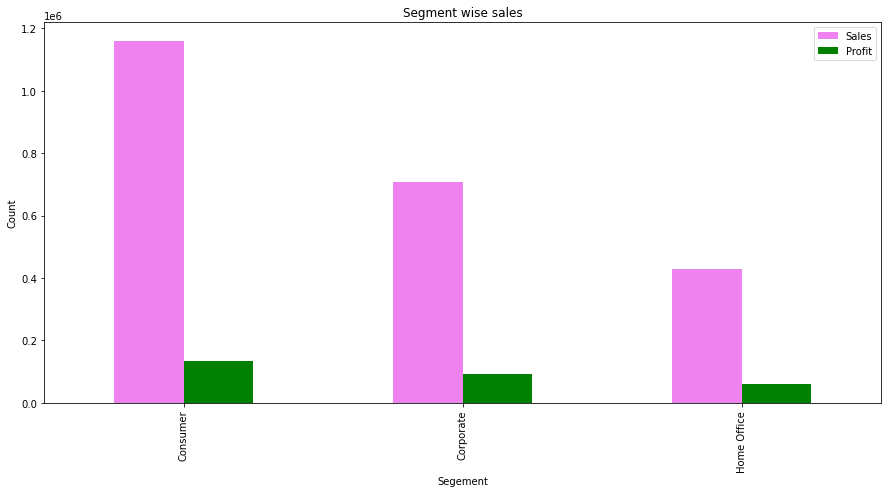

In [42]:
#segment wise sales and profit 

superstore.groupby(['Segment'])['Sales', 'Profit'].sum().plot.bar(color=['violet','green'],figsize=(15,7))
plt.xticks(rotation=90)
plt.title('Segment wise sales')
plt.xlabel('Segement')
plt.ylabel('Count')
plt.show()

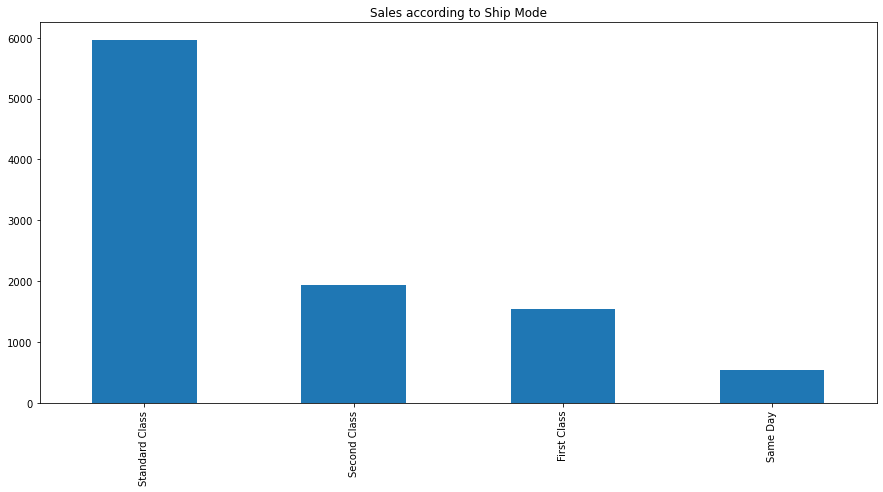

In [40]:
#sales according to the ship mode
plt.figure(figsize=(15,7))
superstore['Ship Mode'].value_counts().plot.bar()
plt.title("Sales according to Ship Mode")
plt.show()

# Sales by category and sub-category

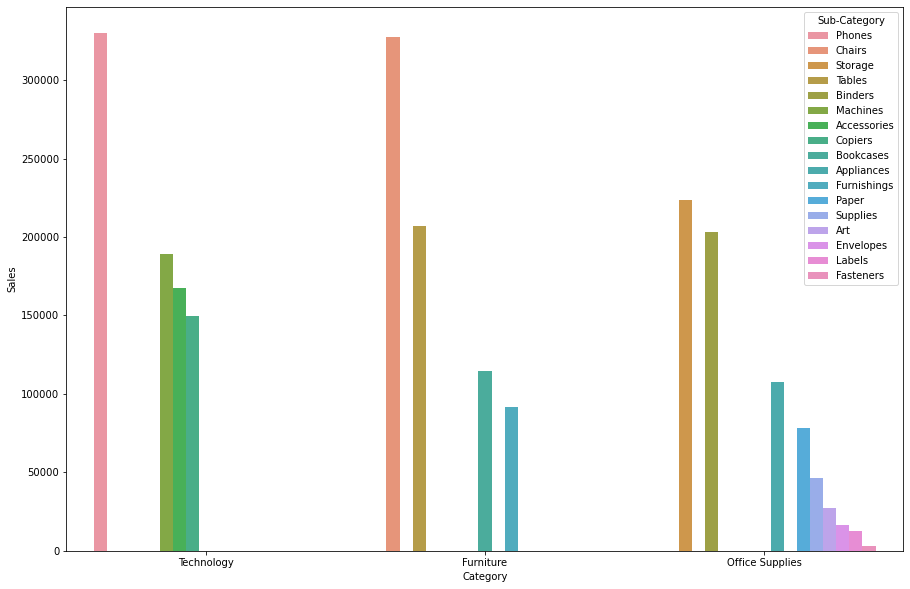

In [49]:
plt.figure(figsize=(15,10))
sales=superstore.groupby(['Category', 'Sub-Category'])['Sales'].aggregate(np.sum).reset_index().sort_values(by=['Sales'], ascending=False)
sales
sns.barplot(x="Category", y="Sales", hue="Sub-Category", data=sales)
plt.show()

we can see that among all the sub categories the phones and chairs have highest sales . 

# Checking Category and Sub-Category wise sales and relevant profit

C:\Users\suman jha\AppData\Local\Temp\ipykernel_5712\2712671508.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  superstore.groupby(['Category'])['Sales', 'Profit'].sum().plot.bar(color=['brown','yellow'],figsize=(20,10))


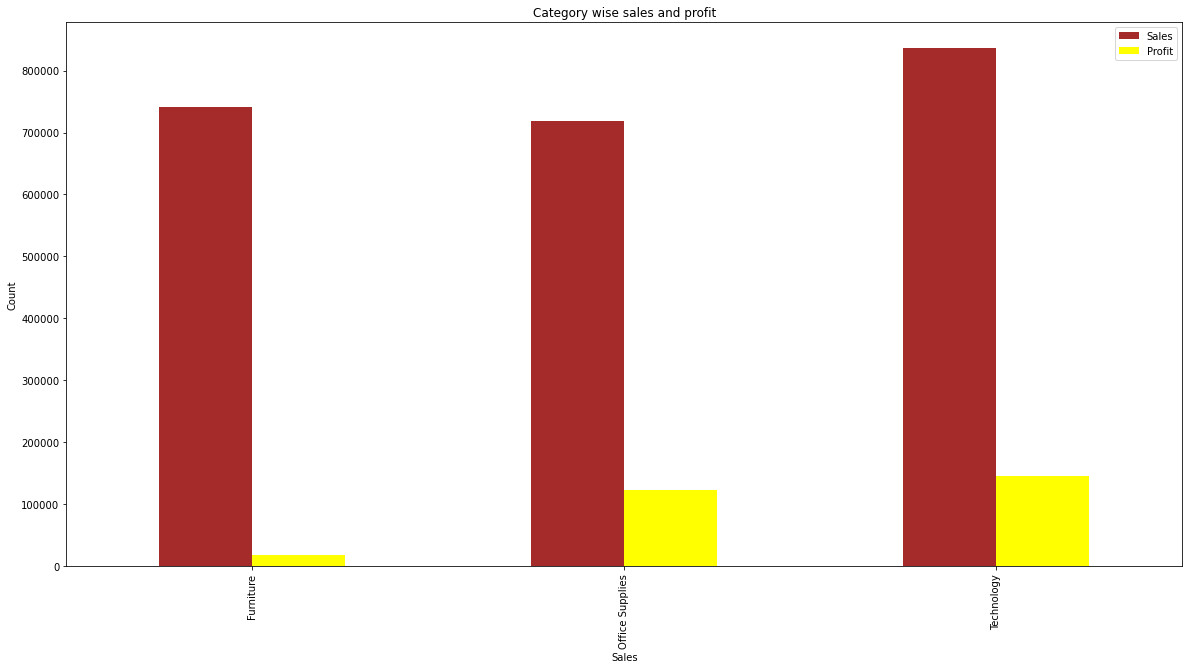

In [51]:
superstore.groupby(['Category'])['Sales', 'Profit'].sum().plot.bar(color=['brown','yellow'],figsize=(20,10))
plt.title('Category wise sales and profit')
plt.xlabel('Sales')
plt.ylabel('Count')
plt.show()

Analysis says Technology has highest sales and profit , where as office supplies has less sales and furniture has lowest profit

C:\Users\suman jha\AppData\Local\Temp\ipykernel_5712\3353240757.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  superstore.groupby(['Sub-Category'])['Sales', 'Profit'].sum().plot.bar(color=['red','black'],figsize=(20,10))


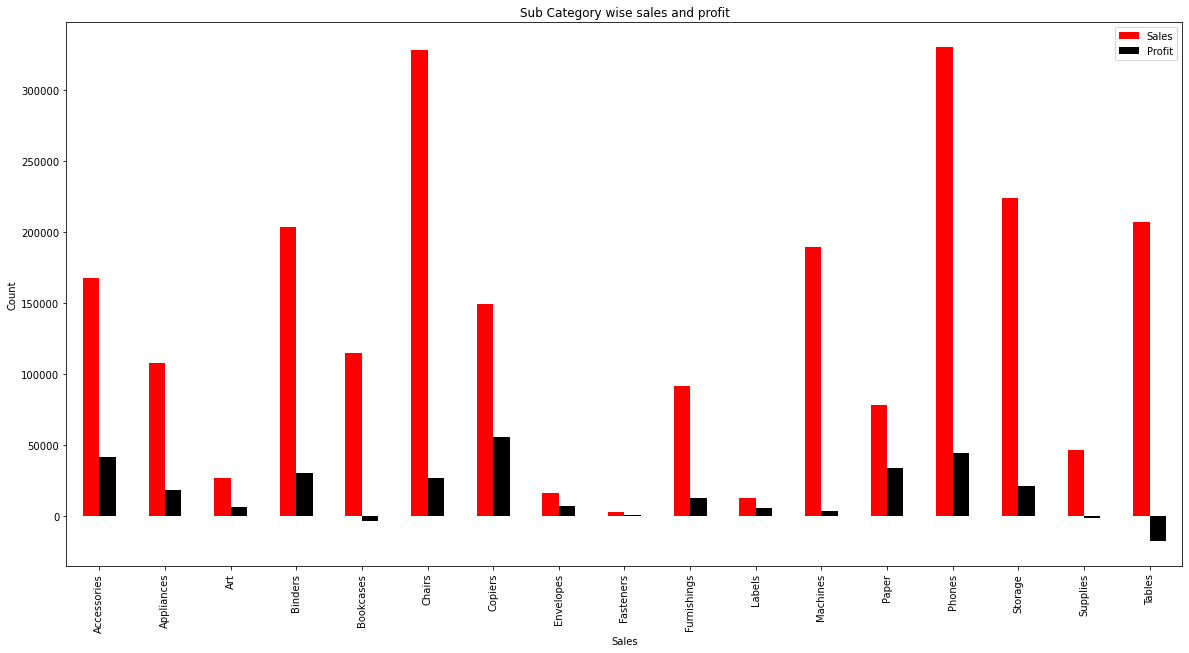

In [53]:
superstore.groupby(['Sub-Category'])['Sales', 'Profit'].sum().plot.bar(color=['red','black'],figsize=(20,10))
plt.title('Sub Category wise sales and profit')
plt.xlabel('Sales')
plt.ylabel('Count')
plt.show()

Here , according to analysis we can say that phone and chair has highest sales, where as copies and phones has the highest
profit among all

# Summary 

The highest sales is in the west region followed by east, central, south . Likewise the overall most sold items is office 
supplies followed by furniture and technology. We aslo came to know that wherever there is 0 discount we got the most sales. 
Similary, consumer goods are sold more and makes the most profit. In the same manner, standard class shipment items are sold 
the most and same day shipment goods are sold less. In the sub-category graph we can see that phones and copies are sold more 
and makes the most profit while labels and fasterners are sold the least. 

# Suggestions

Inorder to increase the sales, we can remove the discount on the product as we can see that the places with least number of 
discount get more sales and profit. Likewise, if we make the shipment standard for the product the sales increases. We also 
have places where there are more sales but less profit. In order to increase the profit there we can reduce the discount on
sales and even try to change the product to Consumer instead of Home office. 